In [1]:
import yfinance as yf
import pandas as pd
import os
import json

In [176]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [177]:
sp500.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

In [178]:
sp500.index = pd.to_datetime(sp500.index)

In [179]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-12'],
              dtype='datetime64[ns]', name='Date', length=18292, freq=None)

In [180]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,0,0
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,0,0
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,0,0


<AxesSubplot: xlabel='Date'>

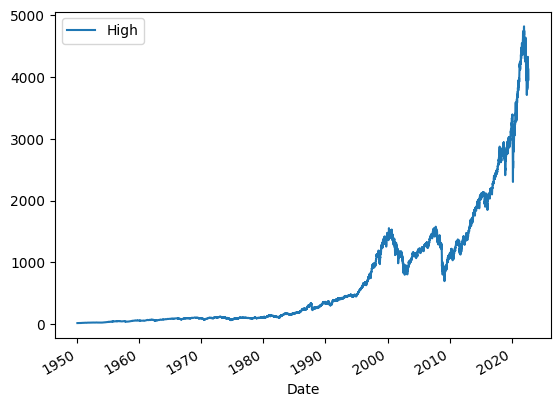

In [182]:
sp500.plot.line(y="High", use_index=True)
# sp500.plot.line(y="Close")

In [183]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [184]:
sp500.shape  # (18292, 5)
sp500.columns   #  Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
# sp500.index   #  DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',... dtype='datetime64[ns]', name='Date', length=18292, freq=None)


Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

#### Creating Target and Predictors

In [185]:
data = sp500[['Close']]
data = data.rename(columns={'Close':'Actual_Close'})
data['Target'] = sp500.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])['Close'] #   if next day Close was higher or not

In [186]:
data.tail(5)   # Target is in data as Actual_Close ; Target is bool if it was higher or not

,Actual_Close,Target
Date,,
2022-09-06,3908.189941,0.0
2022-09-07,3979.870117,1.0
2022-09-08,4006.179932,1.0
2022-09-09,4067.360107,1.0
2022-09-12,4107.279785,1.0


In [187]:
sp500_prev = sp500.copy()
sp500_prev = sp500_prev.shift(1) #   shift the entire set forward 1 row 


In [188]:
sp500_prev.head(7)

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03,NaN,NaN,NaN,NaN,NaN
1950-01-04,16.660000,16.660000,16.660000,16.660000,1260000.0
1950-01-05,16.850000,16.850000,16.850000,16.850000,1890000.0
1950-01-06,16.930000,16.930000,16.930000,16.930000,2550000.0
1950-01-09,16.980000,16.980000,16.980000,16.980000,2010000.0
1950-01-10,17.080000,17.080000,17.080000,17.080000,2520000.0
1950-01-11,17.030001,17.030001,17.030001,17.030001,2160000.0


In [189]:
predictors = ['Close', 'High', 'Open','Low', 'Volume']  #    based on these colums data
data = data.join(sp500_prev[predictors]).iloc[1:]  # cut first NaN raw and join w shifted sp500


In [190]:
data.head(9)

,Actual_Close,Target,Close,High,Open,Low,Volume
Date,,,,,,,
1950-01-04,16.850000,1.0,16.660000,16.660000,16.660000,16.660000,1260000.0
1950-01-05,16.930000,1.0,16.850000,16.850000,16.850000,16.850000,1890000.0
1950-01-06,16.980000,1.0,16.930000,16.930000,16.930000,16.930000,2550000.0
1950-01-09,17.080000,1.0,16.980000,16.980000,16.980000,16.980000,2010000.0
1950-01-10,17.030001,0.0,17.080000,17.080000,17.080000,17.080000,2520000.0
1950-01-11,17.090000,1.0,17.030001,17.030001,17.030001,17.030001,2160000.0
1950-01-12,16.760000,0.0,17.090000,17.090000,17.090000,17.090000,2630000.0
1950-01-13,16.670000,0.0,16.760000,16.760000,16.760000,16.760000,2970000.0
1950-01-16,16.719999,1.0,16.670000,16.670000,16.670000,16.670000,3330000.0


#### Creating Model

In [191]:
# !pip install scikit_learn
from sklearn.ensemble import RandomForestClassifier

- random_state: keeps same results while rerunning each time 
- min_samples_split 200 : prevents overfitting of rules to data  
- n_estimators: how many decision trees to use & avrg the results of 100 decision trees 

In [192]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state= 1) # probably less then 500- try diff v
train = data.iloc[:-100] # take all but last 100 rows
test = data.iloc[-100:] # take last 100 rows

model.fit(train[predictors], train['Target'])


RandomForestClassifier(min_samples_split=200, random_state=1)

In [193]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
preds

array([1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [194]:
preds = pd.Series(preds, index= test.index)

In [195]:
preds.head()

Date
2022-04-20    1.0
2022-04-21    1.0
2022-04-22    0.0
2022-04-25    0.0
2022-04-26    1.0
dtype: float64

In [196]:
test['Target']

Date
2022-04-20    0.0
2022-04-21    0.0
2022-04-22    0.0
2022-04-25    1.0
2022-04-26    0.0
             ... 
2022-09-06    0.0
2022-09-07    1.0
2022-09-08    1.0
2022-09-09    1.0
2022-09-12    1.0
Name: Target, Length: 100, dtype: float64

In [198]:
type(preds)

pandas.core.series.Series

In [199]:
precision_score(test['Target'], preds)  #  0.4631578947368421

0.4631578947368421

In [200]:
combined = pd.concat({"Target": test['Target'], "Predictions": preds}, axis= 1)

In [201]:
combined

,Target,Predictions
Date,,
2022-04-20,0.0,1.0
2022-04-21,0.0,1.0
2022-04-22,0.0,0.0
2022-04-25,1.0,0.0
2022-04-26,0.0,1.0
...,...,...
2022-09-06,0.0,1.0
2022-09-07,1.0,1.0
2022-09-08,1.0,1.0


<AxesSubplot: xlabel='Date'>

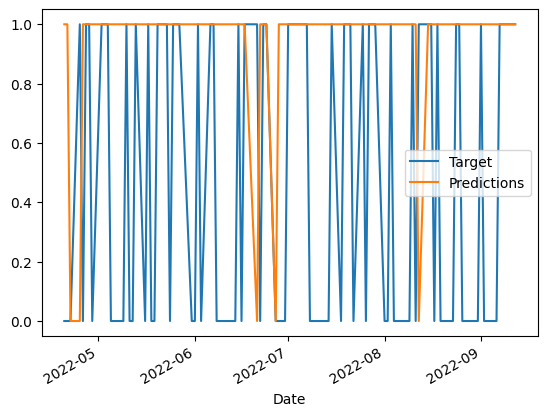

In [202]:
combined.plot()

### Creating a backtesting machine

In [203]:
train    # 1950-01-04   2022-04-19

,Actual_Close,Target,Close,High,Open,Low,Volume
Date,,,,,,,
1950-01-04,16.850000,1.0,16.660000,16.660000,16.660000,16.660000,1.260000e+06
1950-01-05,16.930000,1.0,16.850000,16.850000,16.850000,16.850000,1.890000e+06
1950-01-06,16.980000,1.0,16.930000,16.930000,16.930000,16.930000,2.550000e+06
1950-01-09,17.080000,1.0,16.980000,16.980000,16.980000,16.980000,2.010000e+06
1950-01-10,17.030001,0.0,17.080000,17.080000,17.080000,17.080000,2.520000e+06
...,...,...,...,...,...,...,...
2022-04-12,4397.450195,0.0,4412.529785,4464.350098,4462.640137,4408.379883,3.452540e+09
2022-04-13,4446.589844,1.0,4397.450195,4471.000000,4437.589844,4381.339844,3.451990e+09
2022-04-14,4392.589844,0.0,4446.589844,4453.919922,4394.299805,4392.700195,3.273140e+09


In [204]:
test #  2022-04-20   2022-09-12

,Actual_Close,Target,Close,High,Open,Low,Volume
Date,,,,,,,
2022-04-20,4459.450195,0.0,4462.209961,4471.029785,4390.629883,4390.629883,3.197930e+09
2022-04-21,4393.660156,0.0,4459.450195,4488.290039,4472.259766,4448.759766,3.678040e+09
2022-04-22,4271.779785,0.0,4393.660156,4512.939941,4489.169922,4384.470215,3.833570e+09
2022-04-25,4296.120117,1.0,4271.779785,4385.830078,4385.830078,4267.620117,3.930660e+09
2022-04-26,4175.200195,0.0,4296.120117,4299.020020,4255.339844,4200.819824,4.061070e+09
...,...,...,...,...,...,...,...
2022-09-06,3908.189941,0.0,3924.260010,4018.429932,3994.659912,3906.209961,4.134920e+09
2022-09-07,3979.870117,1.0,3908.189941,3942.550049,3930.889893,3886.750000,2.209800e+09
2022-09-08,4006.179932,1.0,3979.870117,3987.889893,3909.429932,3906.030029,0.000000e+00


In [223]:
start = 1000
step = 750   # set to 100 for longer training and better predictions
def backtest(data, model, predictors, start, step):
    predictions = []

    for i in range(start, data.shape[0], step):
        
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i + step)].copy() 
        
        model.fit(train[predictors], train['Target'])
        
        
        preds = model.predict_proba(test[predictors])[:, 1]
        preds = pd.Series(preds, index= test.index)
        preds[preds > .6] = 1
        preds[preds <= .6] = 0
        
        combined = pd.concat({'Target': test['Target'], 'Predictions': preds}, axis = 1)
        
        predictions.append(combined)

    predictions = pd.concat(predictions)
    return predictions


In [226]:
pre = backtest(data, model, predictors, start, step)

In [244]:
precision_score(pre['Target'], pre['Predictions'])  #     0.5364469663902226

0.5364469663902226

In [228]:
pre['Predictions'].value_counts()

0.0    15000
1.0     2291
Name: Predictions, dtype: int64

In [ ]:
combined #   target & predictions next to each other in columns

### Further features for better predictions

In [230]:
weekly_mean = data.rolling(7).mean()

In [232]:
weekly_mean.shape

(18291, 7)

In [233]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()

In [234]:
weekly_trend = data.shift(1).rolling(7).mean()['Target']  #  48 minute

In [238]:
data['weekly_mean'] = weekly_mean['Close'] / data['Close']
data['quarterly_mean'] = quarterly_mean['Close'] / data['Close']
data['annual_mean'] = annual_mean['Close'] / data['Close']

data['annual_weekly_mean'] = data['annual_mean'] / data['weekly_mean']
data['annual_quarterly_mean'] = data['annual_mean'] / data['quarterly_mean']
data['weekly_trend'] = weekly_trend

data['open_close_ratio'] = data['Open'] / data['Close']
data['high_close_ratio'] = data['High'] / data['Close']
data['low_close_ratio'] = data['Low'] / data['Close']

full_predictors = predictors = ['weekly_mean', 'annual_mean', 'annual_weekly_mean',
                                'annual_quarterly_mean', 'weekly_trend', 'open_close_ratio', 
                                'high_close_ratio','low_close_ratio']

In [240]:
predictions2 = backtest(data.iloc[365:], model, full_predictors, start, step)

In [241]:
predictions2

,Target,Predictions
Date,,
1955-06-16,1.0,1.0
1955-06-17,1.0,1.0
1955-06-20,1.0,1.0
1955-06-21,1.0,1.0
1955-06-22,1.0,1.0
...,...,...
2022-09-06,0.0,0.0
2022-09-07,1.0,0.0
2022-09-08,1.0,0.0


In [242]:
precision_score(predictions2['Target'], predictions2['Predictions'])  #  0.5886491557223265

0.5886491557223265

#### Conclusion:
- Improved from  0.54  to 0.59 with more features. Remains experimentation w params and other features.

In [60]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    # print('Ratio_column is: ', ratio_column)
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    # print('sp500.column is: ',sp500[ratio_column])
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    # print("sp500[trend_column] ", sp500[trend_column])
    
    new_predictors += [ratio_column, trend_column]
    # print("New_predictors: ",  new_predictors )

New_predictors:  ['Close_Ratio_2', 'Trend_2']
New_predictors:  ['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5']
New_predictors:  ['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5', 'Close_Ratio_60', 'Trend_60']
New_predictors:  ['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5', 'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250']
New_predictors:  ['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5', 'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250', 'Close_Ratio_1000', 'Trend_1000']


In [ ]:
new_predictors

In [64]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Yesterday,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,NaN,16.850000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.660000,16.930000,0,1.005670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.850000,16.980000,0,1.002368,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,16.930000,17.080000,0,1.001474,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,16.980000,17.030001,0,1.002936,0.0,1.010651,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3924.260010,3979.870117,1,0.997948,1.0,0.989893,4.0,0.982136,34.0,0.902791,130.0,1.103594,457.0
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,3908.189941,4006.179932,0,1.009087,2.0,1.008370,4.0,0.999819,34.0,0.919786,130.0,1.123489,458.0
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,3979.870117,4067.360107,0,1.003294,1.0,1.012411,3.0,1.005349,33.0,0.926253,129.0,1.130564,457.0


In [69]:
sp500 = sp500.dropna(subset= sp500.columns[sp500.columns != "Tomorrow"])

In [70]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Yesterday,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
1954-01-05,25.100000,25.100000,25.100000,25.100000,1520000,24.950001,25.139999,0,1.002997,0.0,1.010711,2.0,1.024490,24.0,1.016073,119.0,1.115463,437.0
1954-01-06,25.139999,25.139999,25.139999,25.139999,1460000,25.100000,25.059999,0,1.000796,0.0,1.007534,1.0,1.024902,23.0,1.017895,118.0,1.116829,437.0
1954-01-07,25.059999,25.059999,25.059999,25.059999,1540000,25.139999,24.930000,1,0.998406,0.0,1.001919,0.0,1.020615,22.0,1.014864,117.0,1.112873,437.0
1954-01-08,24.930000,24.930000,24.930000,24.930000,1260000,25.059999,24.799999,1,0.997399,1.0,0.995766,1.0,1.014418,23.0,1.009788,117.0,1.106709,438.0
1954-01-11,24.799999,24.799999,24.799999,24.799999,1220000,24.930000,24.930000,1,0.997386,2.0,0.991762,2.0,1.008349,24.0,1.004694,117.0,1.100561,439.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02,3994.659912,4018.429932,3906.209961,3924.260010,4134920000,3966.850098,3908.189941,1,0.994603,1.0,0.987838,4.0,0.985722,34.0,0.905996,130.0,1.108446,456.0
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3924.260010,3979.870117,1,0.997948,1.0,0.989893,4.0,0.982136,34.0,0.902791,130.0,1.103594,457.0
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,3908.189941,4006.179932,0,1.009087,2.0,1.008370,4.0,0.999819,34.0,0.919786,130.0,1.123489,458.0


In [71]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [72]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[: , 1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis= 1)
    return combined

In [73]:
predictions = backtest(sp500, model, new_predictors)

In [77]:
predictions["Predictions"].value_counts()  #  0.0    7875     1.0    6916   ;

0.0    7875
1.0    6916
Name: Predictions, dtype: int64

In [78]:
precision_score(predictions["Target"], predictions["Predictions"])   #  0.5701863354037268   ;  1.0   ;

1.0

In [79]:
predictions["Target"].value_counts() / predictions.shape[0]   #   b1    0.546855   0    0.453145  ;  0    0.532013  1    0.467987  ;

0    0.532013
1    0.467987
Name: Target, dtype: float64

In [80]:
predictions

,Target,Predictions
Date,,
1963-12-09,1,1.0
1963-12-10,0,0.0
1963-12-11,1,1.0
1963-12-12,0,0.0
1963-12-13,0,0.0
...,...,...
2022-09-02,1,1.0
2022-09-06,1,1.0
2022-09-07,0,0.0
